In [72]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [73]:
df = pd.read_csv("cleaned_imdb.csv")

In [74]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79
1,Atlas,2024,1h 58m,PG-13,5.6,37
2,Civil War,2024,1h 49m,R,7.3,75
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73
4,Mad Max: Fury Road,2015,2h,R,8.1,90
...,...,...,...,...,...,...
5045,Come True,2020,1h 45m,Other,6.0,68
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48
5047,Hemel,2012,1h 20m,Other,5.6,0
5048,Kabhi Khushi Kabhie Gham...,2001,3h 30m,Other,7.4,0


In [75]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79
1,Atlas,2024,1h 58m,PG-13,5.6,37
2,Civil War,2024,1h 49m,R,7.3,75
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73
4,Mad Max: Fury Road,2015,2h,R,8.1,90
...,...,...,...,...,...,...
5045,Come True,2020,1h 45m,Other,6.0,68
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48
5047,Hemel,2012,1h 20m,Other,5.6,0
5048,Kabhi Khushi Kabhie Gham...,2001,3h 30m,Other,7.4,0


In [76]:
df['Rated'].isnull().sum()

0

In [77]:
df = df[df['Rated'] != 'Unrated']

In [78]:
df.shape

(5050, 6)

In [79]:
df['Rated'].unique()

array(['R', 'PG-13', 'PG', 'Other', 'G', 'TV-MA', 'TV-14', 'NC-17',
       'TV-PG', 'TV-Y7', '18+', 'TV-G', '13+', '16+'], dtype=object)

In [80]:
df.head(50
)

,Movie Name,Year,Duration,Rated,Score,Metascore
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79
1,Atlas,2024,1h 58m,PG-13,5.6,37
2,Civil War,2024,1h 49m,R,7.3,75
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73
4,Mad Max: Fury Road,2015,2h,R,8.1,90
5,Kingdom of the Planet of the Apes,2024,2h 25m,PG-13,7.2,66
6,Dune: Part Two,2024,2h 46m,PG-13,8.6,79
7,IF,2024,1h 44m,PG,6.7,46
8,Challengers,2024,2h 11m,R,7.4,82
9,The First Omen,2024,1h 59m,R,6.6,65


In [81]:
dff=pd.read_csv("cleaned_imdb.csv")

In [82]:
df.shape

(5050, 6)

In [83]:
df.isnull().sum()

Movie Name    0
Year          0
Duration      0
Rated         0
Score         0
Metascore     0
dtype: int64

In [84]:
dff=dff[dff['Rated']!='Unrated']

In [85]:
dff.head(50)

,Movie Name,Year,Duration,Rated,Score,Metascore
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79
1,Atlas,2024,1h 58m,PG-13,5.6,37
2,Civil War,2024,1h 49m,R,7.3,75
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73
4,Mad Max: Fury Road,2015,2h,R,8.1,90
5,Kingdom of the Planet of the Apes,2024,2h 25m,PG-13,7.2,66
6,Dune: Part Two,2024,2h 46m,PG-13,8.6,79
7,IF,2024,1h 44m,PG,6.7,46
8,Challengers,2024,2h 11m,R,7.4,82
9,The First Omen,2024,1h 59m,R,6.6,65


In [86]:
dff['Rated'].unique()

array(['R', 'PG-13', 'PG', 'Other', 'G', 'TV-MA', 'TV-14', 'NC-17',
       'TV-PG', 'TV-Y7', '18+', 'TV-G', '13+', '16+'], dtype=object)

In [87]:
dff['Score'].unique()

array([7.9, 5.6, 7.3, 7. , 8.1, 7.2, 8.6, 6.7, 7.4, 6.6, 5.8, 6.9, 6.4,
       7.6, 6.1, 7.8, 6.2, 8. , 5.5, 8.3, 6.8, 7.1, 7.7, 6.5, 5.7, 7.5,
       8.2, 8.7, 5.2, 6.3, 5.3, 8.5, 8.8, 9. , 8.9, 6. , 8.4, 5.1, 5.4,
       5. , 5.9, 9.1, 9.2])

In [88]:
df=pd.read_csv("cleaned_imdb.csv")

In [89]:
df.shape

(5050, 6)

In [90]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79
1,Atlas,2024,1h 58m,PG-13,5.6,37
2,Civil War,2024,1h 49m,R,7.3,75
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73
4,Mad Max: Fury Road,2015,2h,R,8.1,90
...,...,...,...,...,...,...
5045,Come True,2020,1h 45m,Other,6.0,68
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48
5047,Hemel,2012,1h 20m,Other,5.6,0
5048,Kabhi Khushi Kabhie Gham...,2001,3h 30m,Other,7.4,0


In [91]:
df.shape

(5050, 6)

In [92]:
df=df[df['Rated']!='Not Rated']

In [93]:
df.shape

(5050, 6)

In [94]:
df['Rated'].unique()

array(['R', 'PG-13', 'PG', 'Other', 'G', 'TV-MA', 'TV-14', 'NC-17',
       'TV-PG', 'TV-Y7', '18+', 'TV-G', '13+', '16+'], dtype=object)

# note:
G: General audiences, all ages. 
PG: Parental guidance suggested. 
PG-13: Parents strongly cautioned, some content inappropriate for under 13. 
R: Restricted, under 17 needs adult. 
NC-17: Adults only, no one 17 and under. 
TV-Y7: Suitable for ages 7+. 
TV-G: General audiences, all ages. 
TV-PG: Parental guidance suggested. 
TV-14: Parents strongly cautioned, may be inappropriate for under 14. 
TV-MA: Mature audiences only. 
18+: Adults only. 
13+: Suitable for ages 13+. 
16+: Suitable for ages 16+. 
Approved: Approved by the MPAA.

In [95]:
df=df[df['Rated']!='No']

In [96]:
df.shape

(5050, 6)

In [97]:
df.columns

Index(['Movie Name', 'Year', 'Duration', 'Rated', 'Score', 'Metascore'], dtype='object')

Text(0, 0.5, 'score rate')

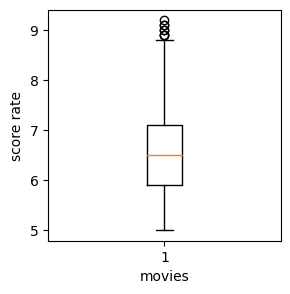

In [98]:
plt.figure(figsize=(3,3))
plt.boxplot(df['Score'])
plt.xlabel('movies')
plt.ylabel('score rate')



Text(0.5, 1.0, 'Metascore')

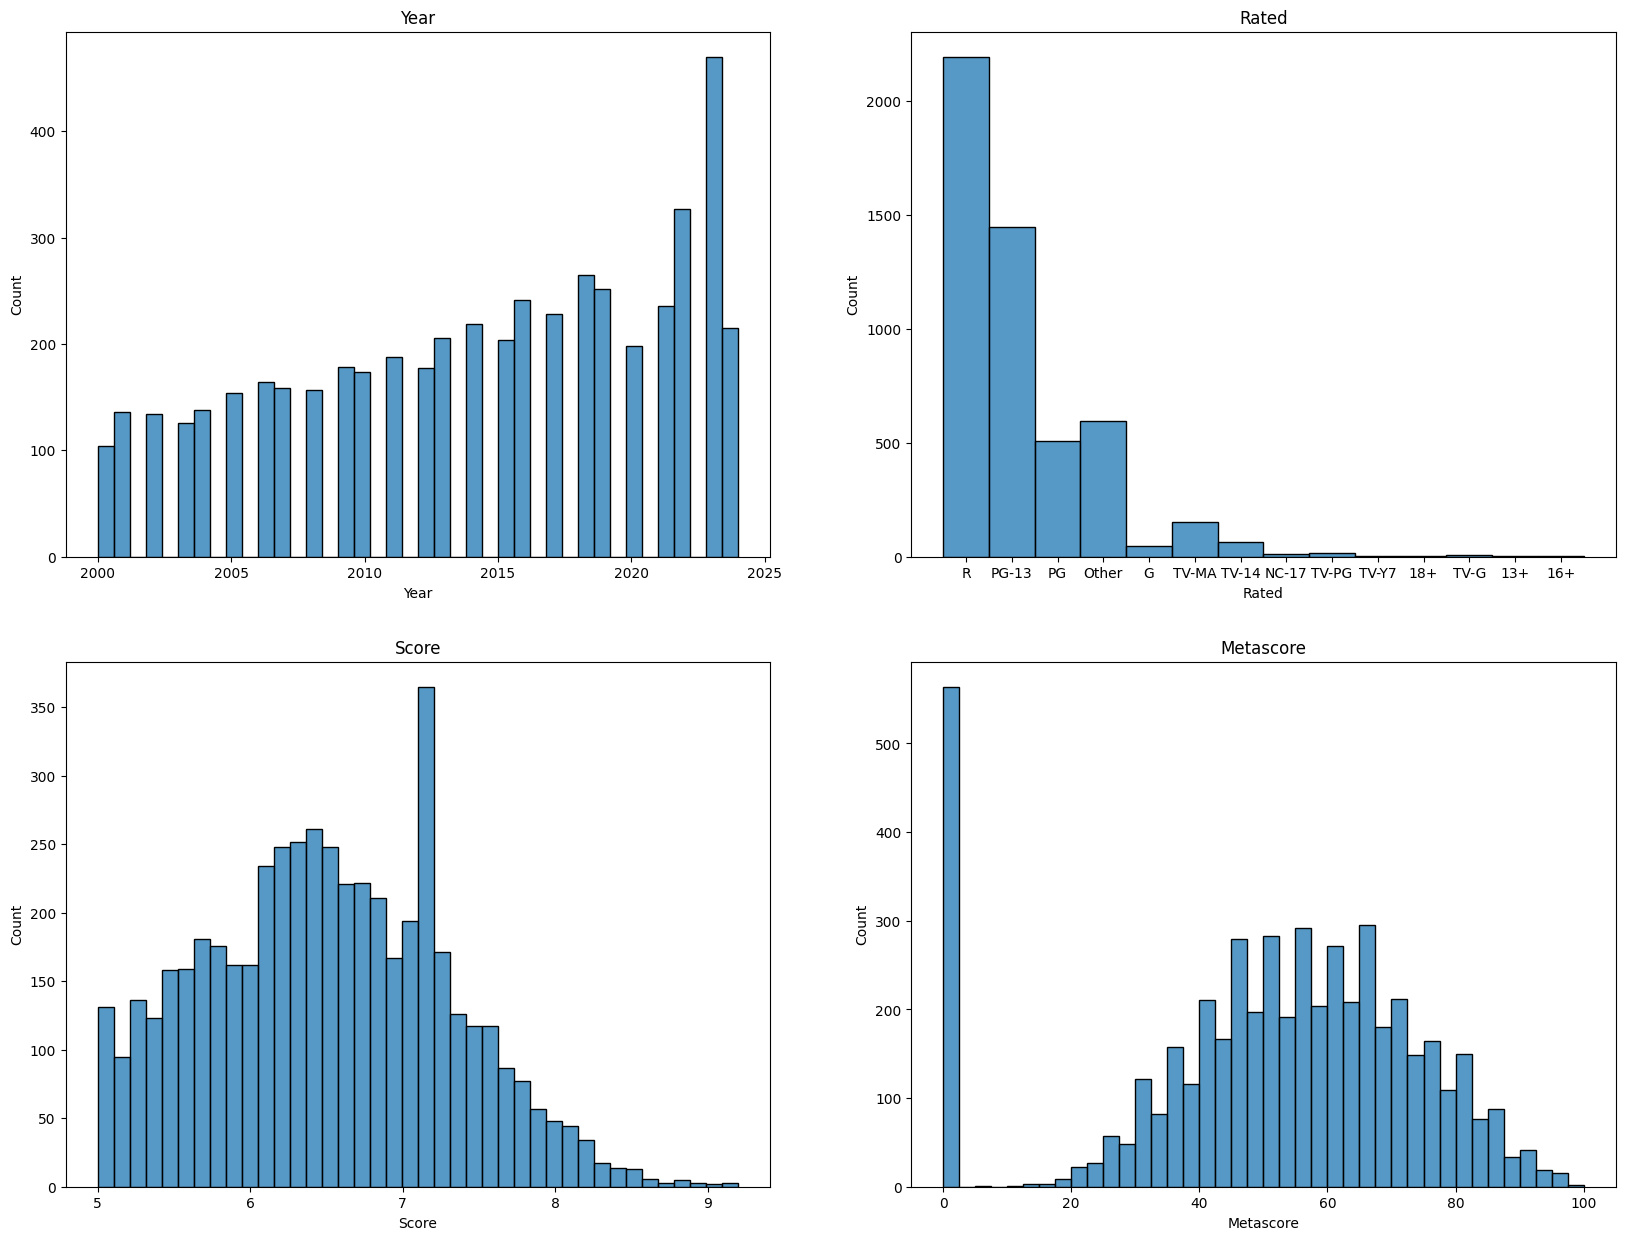

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(df['Year'], bins=40, ax=ax[0, 0])
ax[0, 0].set_title('Year')
sns.histplot(df['Rated'], bins=40, ax=ax[0, 1])
ax[0, 1].set_title('Rated')
sns.histplot(df['Score'], bins=40, ax=ax[1, 0])
ax[1, 0].set_title('Score')
sns.histplot(df['Metascore'], bins=40, ax=ax[1, 1])
ax[1, 1].set_title('Metascore')

In [100]:
df.dtypes

Movie Name     object
Year            int64
Duration       object
Rated          object
Score         float64
Metascore       int64
dtype: object

In [101]:
df=df[df['Metascore']!=0]

In [102]:
df.shape

(4486, 6)

In [103]:
df['Metascore'].describe()

count    4486.000000
mean       57.269728
std        16.077319
min         7.000000
25%        46.000000
50%        57.000000
75%        69.000000
max       100.000000
Name: Metascore, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12383848790>,
 'caps': [<matplotlib.lines.Line2D at 0x12383818450>,
 'boxes': [<matplotlib.lines.Line2D at 0x123813a7ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1238384aa50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1238384b2d0>],
 'means': []}

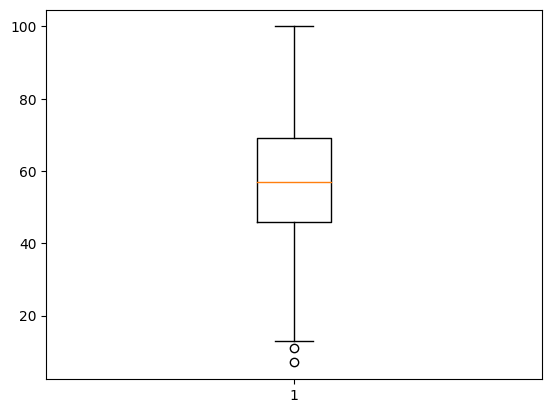

In [104]:
plt.boxplot(df['Metascore'])

In [105]:
df=df[df['Metascore']>=10]

{'whiskers': [<matplotlib.lines.Line2D at 0x123812bd490>,
 'caps': [<matplotlib.lines.Line2D at 0x123838a6790>,
 'boxes': [<matplotlib.lines.Line2D at 0x123838a4bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x123838a7910>],
 'fliers': [<matplotlib.lines.Line2D at 0x12383876a10>],
 'means': []}

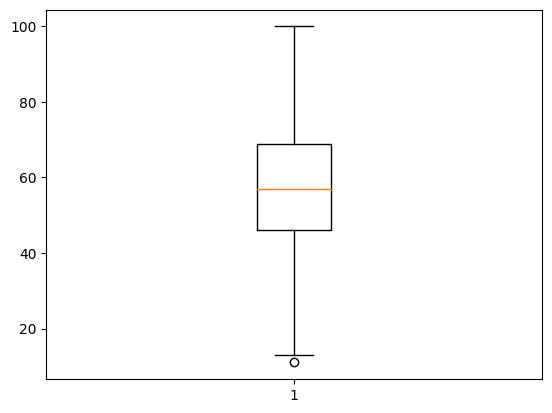

In [106]:
plt.boxplot(df['Metascore'])

In [107]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79
1,Atlas,2024,1h 58m,PG-13,5.6,37
2,Civil War,2024,1h 49m,R,7.3,75
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73
4,Mad Max: Fury Road,2015,2h,R,8.1,90
...,...,...,...,...,...,...
5040,The 15:17 to Paris,2018,1h 34m,PG-13,5.3,45
5043,Whale Rider,2002,1h 41m,PG-13,7.5,80
5045,Come True,2020,1h 45m,Other,6.0,68
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48


In [108]:
df.columns


Index(['Movie Name', 'Year', 'Duration', 'Rated', 'Score', 'Metascore'], dtype='object')

In [109]:
df.shape

(4485, 6)

In [110]:
p35 = df['Score'].quantile(0.35)
p75 = df['Score'].quantile(0.75)
def categorize_score(price):
    if price < p35:
        return 'Bad movie'
    elif price < p75:
        return 'Good_movie'
    else:
        return 'superb'

# Apply the function to create a new column
df['catigory_Score'] = df['Score'].apply(categorize_score)

In [111]:
# p35 = df['Score'].quantile(0.35)
# p75 = df['Score'].quantile(0.75)
def categorize_year(year):
    if year < 2010:
        return 'old'
    elif year < 2020:
        return 'not old'
    else:
        return 'new'

# Apply the function to create a new column
df['catigory_year'] = df['Year'].apply(categorize_year)

In [112]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore,catigory_Score,catigory_year
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79,superb,new
1,Atlas,2024,1h 58m,PG-13,5.6,37,Bad movie,new
2,Civil War,2024,1h 49m,R,7.3,75,superb,new
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73,Good_movie,new
4,Mad Max: Fury Road,2015,2h,R,8.1,90,superb,not old
...,...,...,...,...,...,...,...,...
5040,The 15:17 to Paris,2018,1h 34m,PG-13,5.3,45,Bad movie,not old
5043,Whale Rider,2002,1h 41m,PG-13,7.5,80,superb,old
5045,Come True,2020,1h 45m,Other,6.0,68,Bad movie,new
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48,Good_movie,old


In [113]:
df['Duration'].value_counts()

Duration
1h 40m    134
1h 44m    129
1h 47m    122
1h 41m    121
1h 35m    120
         ... 
3h 12m      1
2h 56m      1
2h 48m      1
2h 52m      1
1h 15m      1
Name: count, Length: 122, dtype: int64

In [114]:
def convert_to_minutes(duration):
    try:
        h, m = duration.split('h ')
        return int(h) * 60 + int(m[:-1])
    except ValueError:
        # Handle cases where the format is incorrect
        return None

# Apply the function to the 'Duration' column
df['Duration_in_minutes'] = df['Duration'].apply(convert_to_minutes)

# Drop rows with None values if any
df.dropna(subset=['Duration_in_minutes'], inplace=True)

# Display the value counts of the converted 'Duration_in_minutes' column
duration_counts = df['Duration_in_minutes'].value_counts()


In [115]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore,catigory_Score,catigory_year,Duration_in_minutes
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79,superb,new,148.0
1,Atlas,2024,1h 58m,PG-13,5.6,37,Bad movie,new,118.0
2,Civil War,2024,1h 49m,R,7.3,75,superb,new,109.0
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73,Good_movie,new,126.0
5,Kingdom of the Planet of the Apes,2024,2h 25m,PG-13,7.2,66,superb,new,145.0
...,...,...,...,...,...,...,...,...,...
5040,The 15:17 to Paris,2018,1h 34m,PG-13,5.3,45,Bad movie,not old,94.0
5043,Whale Rider,2002,1h 41m,PG-13,7.5,80,superb,old,101.0
5045,Come True,2020,1h 45m,Other,6.0,68,Bad movie,new,105.0
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48,Good_movie,old,93.0


In [116]:
def categorize_dur(dur):
    if dur < 90:
        return 'short'
    elif dur < 110:
        return 'Medium Movie'
    else:
        return 'Long Movie'

# Apply the function to create a new column
df['catigory_Duration'] = df['Duration_in_minutes'].apply(categorize_dur)

In [117]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore,catigory_Score,catigory_year,Duration_in_minutes,catigory_Duration
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79,superb,new,148.0,Long Movie
1,Atlas,2024,1h 58m,PG-13,5.6,37,Bad movie,new,118.0,Long Movie
2,Civil War,2024,1h 49m,R,7.3,75,superb,new,109.0,Medium Movie
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73,Good_movie,new,126.0,Long Movie
5,Kingdom of the Planet of the Apes,2024,2h 25m,PG-13,7.2,66,superb,new,145.0,Long Movie
...,...,...,...,...,...,...,...,...,...,...
5040,The 15:17 to Paris,2018,1h 34m,PG-13,5.3,45,Bad movie,not old,94.0,Medium Movie
5043,Whale Rider,2002,1h 41m,PG-13,7.5,80,superb,old,101.0,Medium Movie
5045,Come True,2020,1h 45m,Other,6.0,68,Bad movie,new,105.0,Medium Movie
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48,Good_movie,old,93.0,Medium Movie


In [118]:
df['catigory_Duration'].value_counts()

catigory_Duration
Medium Movie    2221
Long Movie      1829
short            363
Name: count, dtype: int64

In [119]:
categorical_features=['catigory_Score','catigory_year','catigory_Duration']
df = pd.get_dummies(df, columns=categorical_features)

In [120]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore,Duration_in_minutes,catigory_Score_Bad movie,catigory_Score_Good_movie,catigory_Score_superb,catigory_year_new,catigory_year_not old,catigory_year_old,catigory_Duration_Long Movie,catigory_Duration_Medium Movie,catigory_Duration_short
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79,148.0,False,False,True,True,False,False,True,False,False
1,Atlas,2024,1h 58m,PG-13,5.6,37,118.0,True,False,False,True,False,False,True,False,False
2,Civil War,2024,1h 49m,R,7.3,75,109.0,False,False,True,True,False,False,False,True,False
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73,126.0,False,True,False,True,False,False,True,False,False
5,Kingdom of the Planet of the Apes,2024,2h 25m,PG-13,7.2,66,145.0,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,The 15:17 to Paris,2018,1h 34m,PG-13,5.3,45,94.0,True,False,False,False,True,False,False,True,False
5043,Whale Rider,2002,1h 41m,PG-13,7.5,80,101.0,False,False,True,False,False,True,False,True,False
5045,Come True,2020,1h 45m,Other,6.0,68,105.0,True,False,False,True,False,False,False,True,False
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48,93.0,False,True,False,False,False,True,False,True,False


In [121]:
columns_to_convert = ['catigory_Score_Bad movie','catigory_Score_Good_movie','catigory_Score_superb','catigory_year_new','catigory_year_not old','catigory_year_old','catigory_Duration_Long Movie',	'catigory_Duration_Medium Movie',	'catigory_Duration_short']

# Convert the specified columns to integer type
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [122]:
df

,Movie Name,Year,Duration,Rated,Score,Metascore,Duration_in_minutes,catigory_Score_Bad movie,catigory_Score_Good_movie,catigory_Score_superb,catigory_year_new,catigory_year_not old,catigory_year_old,catigory_Duration_Long Movie,catigory_Duration_Medium Movie,catigory_Duration_short
0,Furiosa: A Mad Max Saga,2024,2h 28m,R,7.9,79,148.0,0,0,1,1,0,0,1,0,0
1,Atlas,2024,1h 58m,PG-13,5.6,37,118.0,1,0,0,1,0,0,1,0,0
2,Civil War,2024,1h 49m,R,7.3,75,109.0,0,0,1,1,0,0,0,1,0
3,The Fall Guy,2024,2h 6m,PG-13,7.0,73,126.0,0,1,0,1,0,0,1,0,0
5,Kingdom of the Planet of the Apes,2024,2h 25m,PG-13,7.2,66,145.0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,The 15:17 to Paris,2018,1h 34m,PG-13,5.3,45,94.0,1,0,0,0,1,0,0,1,0
5043,Whale Rider,2002,1h 41m,PG-13,7.5,80,101.0,0,0,1,0,0,1,0,1,0
5045,Come True,2020,1h 45m,Other,6.0,68,105.0,1,0,0,1,0,0,0,1,0
5046,Mr. Magorium's Wonder Emporium,2007,1h 33m,G,6.2,48,93.0,0,1,0,0,0,1,0,1,0


In [123]:
df.dtypes

Movie Name                         object
Year                                int64
Duration                           object
Rated                              object
Score                             float64
Metascore                           int64
Duration_in_minutes               float64
catigory_Score_Bad movie            int32
catigory_Score_Good_movie           int32
catigory_Score_superb               int32
catigory_year_new                   int32
catigory_year_not old               int32
catigory_year_old                   int32
catigory_Duration_Long Movie        int32
catigory_Duration_Medium Movie      int32
catigory_Duration_short             int32
dtype: object

## model


In [124]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

# Load your DataFrame
 # Replace 'your_dataset.csv' with the actual path to your CSV file

# Define the features for clustering
features = ['Year', 'Metascore', 'Duration_in_minutes','Score']




In [125]:
X = df[features]

In [126]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
min_samples=2

In [128]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [129]:
distances[:,min_samples-1]

array([0.39899011, 0.37102823, 0.22292752, ..., 0.23829193, 0.08403989,
       0.1545954 ])

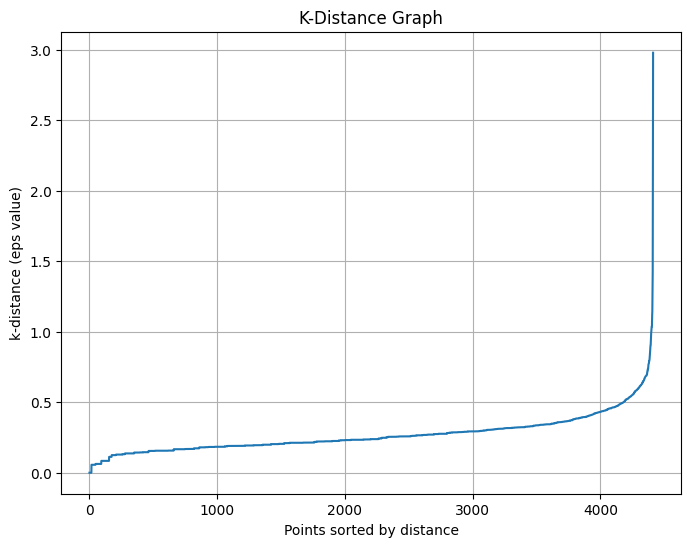

In [130]:
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [131]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=2)
labels = dbscan.fit_predict(X)



In [140]:
clusters = dbscan.fit_predict(X_scaled)

AttributeError: 'DBSCAN' object has no attribute 'predict'

In [133]:
pd.Series(clusters).value_counts()

 0     4340
-1       48
 2        3
 5        3
 8        3
 1        2
 3        2
 4        2
 6        2
 7        2
 9        2
 10       2
 11       2
Name: count, dtype: int64

In [134]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.11358320825018271

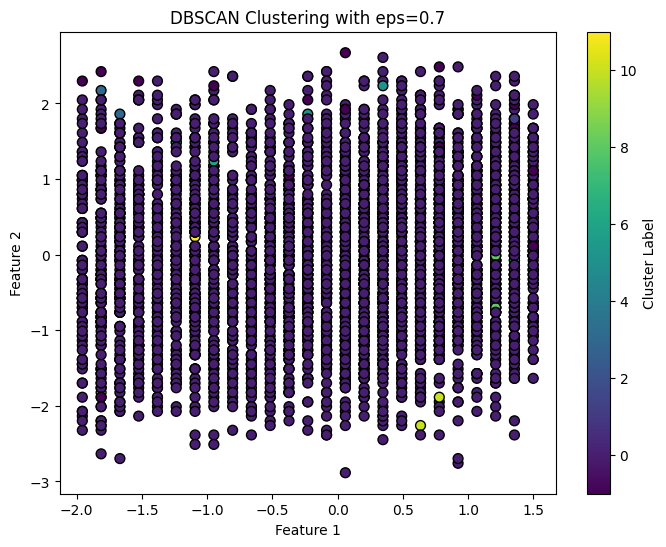

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={0.7}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [136]:
X['dbscan'] = clusters

In [137]:
X['dbscan'].value_counts()

dbscan
 0     4340
-1       48
 2        3
 5        3
 8        3
 1        2
 3        2
 4        2
 6        2
 7        2
 9        2
 10       2
 11       2
Name: count, dtype: int64

In [138]:
df.dtypes

Movie Name                         object
Year                                int64
Duration                           object
Rated                              object
Score                             float64
Metascore                           int64
Duration_in_minutes               float64
catigory_Score_Bad movie            int32
catigory_Score_Good_movie           int32
catigory_Score_superb               int32
catigory_year_new                   int32
catigory_year_not old               int32
catigory_year_old                   int32
catigory_Duration_Long Movie        int32
catigory_Duration_Medium Movie      int32
catigory_Duration_short             int32
dtype: object

In [139]:
import joblib
joblib.dump(clusters, 'Models/dbscan.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')

['Models/scaler.joblib']